# Experiment 1

#### Important notes: <br>
1: Training consisted of 100,000 trials, each presenting an
input/output sequence and then updating the networks
weights <br>
2:  Note that, in all experiments, the number of distinct training
commands is well below 100k: we randomly sampled them with
replacement to reach the target size <br>
3: The ADAM optimization algorithm was used
with default parameters, including a learning rate of 0.001  ( not important becuase diffrent is provided)<br>
4: Gradients with a norm larger
than 5.0 were clipped. (different val provided)<br>
5: During training, for half the
time, the network’s self-produced outputs were passed back
to the next step, and for the other half of the time, the groundtruth outputs were passed back to the next step - teacher
forcing (Can we simulate it in any way? or we drop it cuz its not recurrent) <br>

In [1]:
from experiments.experiment_type import ExperimentType
from experiments.experiment_config import E1_Config
from experiments.experiment import Experiment

conf =  E1_Config()
conf.train_model = True
conf.evaluation_interval = 1
conf.use_tensorboard = False
conf.experiment_name = "E1_1_1"
conf.epochs = 2
conf.k_fold = None#2
Exp = Experiment(ExperimentType.E_1_1, config=conf)
conf





experiment_name: E1_1_1
emb_dim: 128
num_layers: 1
num_heads: 8
forward_dim: 512
dropout: 0.05
learning_rate: 0.0007
batch_size: 64
batch_size_eval: 500
grad_clip: 1
optimizer: AdamW
epochs: 2
model_save_path: saved_data/models/
tensorboard_log_path: saved_data/tensorboard_runs/
results_dict_path: saved_data/eval_results/
model_weights_path: None
device: cuda
train_model: True
use_tensorboard: False
evaluation_interval: 1
k_fold: None
detailed_logging: True

In [2]:
Exp.run()
Exp.save_results(overwrite=True)

--------------------------------------------------
Training started for experiment:  E_1_1 


EPOCH:   0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1/2 Batch 262/524 Trining Loss: 174.64399552345276


EPOCH:  50%|█████     | 1/2 [00:11<00:11, 11.42s/it]

Experiment: E1_1_1_epoch_1 Results, Type: E_1_1
(ORG)E1_1_1_epoch_1 E_1_1 CORRECT TL ORACLE: 38965
(ORG)E1_1_1_epoch_1 E_1_1 CORRECT SL ORACLE: 650
(ORG)E1_1_1_epoch_1 E_1_1 TOTAL TL ORACLE: 59620
(ORG)E1_1_1_epoch_1 E_1_1 TOTAL SL ORACLE: 4182
(ORG)E1_1_1_epoch_1 E_1_1 ACC TL ORACLE: 0.6535558700561523
(ORG)E1_1_1_epoch_1 E_1_1 ACC SL ORACLE: 0.15542802214622498
(ORG)E1_1_1_epoch_1 E_1_1 ERR TL ORACLE: 0.34644415974617004
(ORG)E1_1_1_epoch_1 E_1_1 ERR SL ORACLE: 0.8445720076560974
(ORG)E1_1_1_epoch_1 E_1_1 CORRECT TL NO_ORACLE: 38210
(ORG)E1_1_1_epoch_1 E_1_1 CORRECT SL NO_ORACLE: 577
(ORG)E1_1_1_epoch_1 E_1_1 TOTAL TL NO_ORACLE: 59620
(ORG)E1_1_1_epoch_1 E_1_1 TOTAL SL NO_ORACLE: 4182
(ORG)E1_1_1_epoch_1 E_1_1 ACC TL NO_ORACLE: 0.6408923268318176
(ORG)E1_1_1_epoch_1 E_1_1 ACC SL NO_ORACLE: 0.13797226548194885
(ORG)E1_1_1_epoch_1 E_1_1 ERR TL NO_ORACLE: 0.3591076731681824
(ORG)E1_1_1_epoch_1 E_1_1 ERR SL NO_ORACLE: 0.8620277643203735
Epoch 2/2 Batch 524/524 Trining Loss: 49.9245782792

EPOCH: 100%|██████████| 2/2 [00:21<00:00, 10.98s/it]

Experiment: E1_1_1_epoch_2 Results, Type: E_1_1
(ORG)E1_1_1_epoch_2 E_1_1 CORRECT TL ORACLE: 56657
(ORG)E1_1_1_epoch_2 E_1_1 CORRECT SL ORACLE: 3359
(ORG)E1_1_1_epoch_2 E_1_1 TOTAL TL ORACLE: 59620
(ORG)E1_1_1_epoch_2 E_1_1 TOTAL SL ORACLE: 4182
(ORG)E1_1_1_epoch_2 E_1_1 ACC TL ORACLE: 0.9503018856048584
(ORG)E1_1_1_epoch_2 E_1_1 ACC SL ORACLE: 0.8032042384147644
(ORG)E1_1_1_epoch_2 E_1_1 ERR TL ORACLE: 0.04969808831810951
(ORG)E1_1_1_epoch_2 E_1_1 ERR SL ORACLE: 0.19679579138755798
(ORG)E1_1_1_epoch_2 E_1_1 CORRECT TL NO_ORACLE: 56276
(ORG)E1_1_1_epoch_2 E_1_1 CORRECT SL NO_ORACLE: 3236
(ORG)E1_1_1_epoch_2 E_1_1 TOTAL TL NO_ORACLE: 59620
(ORG)E1_1_1_epoch_2 E_1_1 TOTAL SL NO_ORACLE: 4182
(ORG)E1_1_1_epoch_2 E_1_1 ACC TL NO_ORACLE: 0.9439114332199097
(ORG)E1_1_1_epoch_2 E_1_1 ACC SL NO_ORACLE: 0.7737924456596375
(ORG)E1_1_1_epoch_2 E_1_1 ERR TL NO_ORACLE: 0.056088559329509735
(ORG)E1_1_1_epoch_2 E_1_1 ERR SL NO_ORACLE: 0.22620755434036255
Training finished for experiment:  E_1_1
The fo

In [57]:
import matplotlib.pyplot as plt
from experiments.metric import MetricTemplate,OracleFlag,MetricType,MetricFlag
from experiments.evaluation_result import EvaluationResult
from experiments.evaluation_result_container import EvaluationResultContainer
import numpy as np
from scipy.interpolate import interp1d

def plot_bar_scalar_across_experiments(ax, scalar_temp:MetricTemplate, container:EvaluationResultContainer, title=None):
    metrics = container.get_data(scalar_temp)
    ax.bar(range(len(metrics)), [m.val for m in metrics], align='center',tick_label=[m.e_name for m in metrics])
    if title:
        ax.set_title(title)
    ax.set_ylabel(scalar_temp.m_types[0].name)
    ax.set_xlabel("Experiment")
    return ax

def plot_bar_array_inter_experiment(ax, scalar_temp:MetricTemplate, result: EvaluationResult, title=None):
    metric = result.get_data(scalar_temp)[0]
    arr = metric.val
    #ax.bar(range(len(arr)),arr , align='center')
    # Define x, y, and xnew to resample at.
    x = np.linspace(0, arr.shape[0],num=arr.shape[0] ,endpoint=True)
    y = arr
    xnew = np.linspace(0, arr.shape[0],  endpoint=True)

    # Define interpolators.
    f_linear = np.interp(xnew, x, y)
    f_cubic = interp1d(x, y, kind='cubic')

    ax.plot(xnew, f_cubic(xnew), label='linear')
    ax.plot(xnew, f_linear(xnew), label='cubic')
    #ax.plot(range(len(arr)),arr)
    if title:
        ax.set_title(title)
    ax.set_ylabel(scalar_temp.m_types[0].name)
    ax.set_xlabel("Length")
    return ax

In [5]:

import pickle as pkl

with open(file = "saved_data/eval_results/E1_1_1.data", mode = "rb") as f:
    e1:EvaluationResult = pkl.load(file = f)
    f.close()

with open(file = "saved_data/eval_results/E1_1_1.data", mode = "rb") as f:
    e2:EvaluationResult = pkl.load(file = f)
    f.close()

print(type(e1))
print(type(e2))

e1

<class 'experiments.evaluation_result_container.EvaluationResultContainer'>
<class 'experiments.evaluation_result_container.EvaluationResultContainer'>


Experiment Results Container: ['E1_1_1_epoch_1', 'E1_1_1_epoch_2']

In [6]:
e_container = EvaluationResultContainer([e1,e2])
for r in e_container.results:
    print(r.experiment_type)

part = e_container[0:2]
print(part)


E_1_1
E_1_1
E_1_1
E_1_1
Experiment Results Container: ['E1_1_1_epoch_1', 'E1_1_1_epoch_2']


In [7]:
import numpy as np
avrg_result = np.mean(e_container)

#avrg_result = np.mean([avrg_result,avrg_result])
#avrg_result = np.mean([avrg_result,avrg_result])
avrg_result += avrg_result
avrg_result -= avrg_result
avrg_result = np.mean([avrg_result,avrg_result])
#avrg_result += 2
#avrg_result /= 2


print(type(avrg_result))
avrg_result

<class 'experiments.evaluation_result.EvaluationResult'>


Experiment: E1_1_1_epoch_Z[Z] Results, Type: E_1_1

In [8]:
a = e_container[0] * e_container[1]
a.print(scalars_only=True)

Experiment: E1_1_1_epoch_Z[Z] Results, Type: E_1_1
(MUL)E1_1_1_epoch_Z[Z] E_1_1 CORRECT TL ORACLE: 2207640005
(MUL)E1_1_1_epoch_Z[Z] E_1_1 CORRECT SL ORACLE: 2183350
(MUL)E1_1_1_epoch_Z[Z] E_1_1 TOTAL TL ORACLE: 3554544400
(MUL)E1_1_1_epoch_Z[Z] E_1_1 TOTAL SL ORACLE: 17489124
(MUL)E1_1_1_epoch_Z[Z] E_1_1 ACC TL ORACLE: 0.6210753756624854
(MUL)E1_1_1_epoch_Z[Z] E_1_1 ACC SL ORACLE: 0.12484044615627177
(MUL)E1_1_1_epoch_Z[Z] E_1_1 ERR TL ORACLE: 0.0172176124483584
(MUL)E1_1_1_epoch_Z[Z] E_1_1 ERR SL ORACLE: 0.16620821663046037
(MUL)E1_1_1_epoch_Z[Z] E_1_1 CORRECT TL NO_ORACLE: 2150305960
(MUL)E1_1_1_epoch_Z[Z] E_1_1 CORRECT SL NO_ORACLE: 1867172
(MUL)E1_1_1_epoch_Z[Z] E_1_1 TOTAL TL NO_ORACLE: 3554544400
(MUL)E1_1_1_epoch_Z[Z] E_1_1 TOTAL SL NO_ORACLE: 17489124
(MUL)E1_1_1_epoch_Z[Z] E_1_1 ACC TL NO_ORACLE: 0.6049455947594637
(MUL)E1_1_1_epoch_Z[Z] E_1_1 ACC SL NO_ORACLE: 0.10676189674047798
(MUL)E1_1_1_epoch_Z[Z] E_1_1 ERR TL NO_ORACLE: 0.020141832032175788
(MUL)E1_1_1_epoch_Z[Z] E_1_1

In [9]:
acc_tl = MetricTemplate(o_flags=[OracleFlag.ORACLE], m_types=[MetricType.ACC], m_flags=[MetricFlag.TL])
print(avrg_result.get_data(acc_tl))

# acc_slol_tl = MetricTemplate(o_flags=[OracleFlag.ORACLE], m_types=[MetricType.ACC], m_flags=[MetricFlag.TLOL])
# print(e1.get_data(acc_slol_tl))
# print(e2.get_data(acc_slol_tl))
# print(avrg_result.get_data(acc_slol_tl)[0])

avrg_result


[(DIV,ADD,SUB,ADD,DIV,ADD,Z)E1_1_1_epoch_Y[ZY] E_1_1 ACC TL ORACLE: 0.0]


Experiment: E1_1_1_epoch_Z[Z] Results, Type: E_1_1

TypeError: 'numpy.ndarray' object is not callable

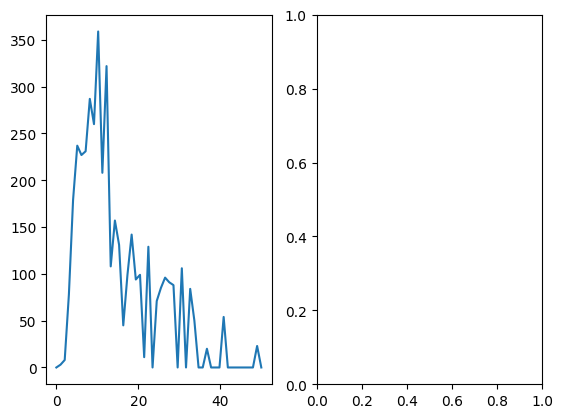

In [58]:
fig,ax = plt.subplots(1,2)
acc_slol_tl = MetricTemplate(o_flags=[OracleFlag.ORACLE], m_types=[MetricType.TOTAL], m_flags=[MetricFlag.SLOL])
plot_bar_array_inter_experiment(ax[0], acc_slol_tl, e_container, "Accuracy")


acc_tl = MetricTemplate(o_flags=[OracleFlag.ORACLE], m_types=[MetricType.ACC], m_flags=[MetricFlag.TL])
plot_bar_scalar_across_experiments(ax[1], acc_tl, e_container, "Accuracy")
plt.show()